In [1]:
include("../continuous_hopfield.jl")
using Plots
using LaTeXStrings
using Random, Distributions
using LinearAlgebra

Take three patterns $\vec{\xi}_{1}$, $\vec{\xi}_{2}$ and $\vec{\xi}_{3}$. Those three patterns are points in the d-dimensional space and thus they define a plane. The goal is to obtain other points on the same plane and compute the energy for each of them. A new pattern can be found as: $$ \vec{\xi}_{new} = \vec{\xi}_{1} + \alpha_1 (\vec{\xi}_{2} - \vec{\xi}_{1}) + \alpha_2 (\vec{\xi}_{3} - \vec{\xi}_{1}),$$
where $$ 0 \leq \alpha_i \leq 1 $$

In [2]:
M = 30
N = 20
ξ = CH.generate_patterns(M, N)
σ1, σ2, σ3 = ξ[:, 1], ξ[:, 2], ξ[:, 3]

([1.5517993934115297, -0.934915274740953, -0.5498738770401532, 0.0052821120602665785, 1.3144279828917513, -1.2137882867594811, -0.41593692120172115, 1.7735917934006455, 0.33177375332096765, 1.0593970795916476, 1.3240366225243854, 0.061421435386504235, 0.6371102507106006, 0.7837840076934917, 0.02672528059939103, 1.2461457291462121, 0.18119501447376402, -0.020237340457856873, 0.10249327725017517, 0.26266315500397397], [1.1282582885431442, -1.6957390977212359, -0.24956813355161547, -0.17674264979514828, 0.5333588945244419, -0.1146108692560198, 1.2979036523697967, 0.8916203333582108, -0.7369863001048226, 2.6278913041576, 0.9273026688890538, 0.2426499534628169, -0.08955603963710523, 0.6605430452267496, 0.020296614173831988, 0.12519915208690421, 0.5744751079604007, 0.1736788014960021, -0.594426663410981, 0.781147615722412], [0.6848319222193818, 0.3839225847833619, 0.3098050664093766, 0.5683531670928726, 0.04920472595461503, -1.513216595683644, -0.5174819027467756, 2.104511691783873, 0.593356

In [3]:
α1 = range(-1, 2, length = 150)
α2 = range(-1, 2, length = 150)

Z = zeros(length(α1), length(α2))

for i in 1:length(α1)
    a = α1[i]
    for j in 1:length(α2)
        σ_new = σ1 + a*(σ2 - σ1) + α2[j]*(σ3 -σ1)
        Z[i, j] = CH.energy(σ_new, ξ, 1, 1)
    end
end

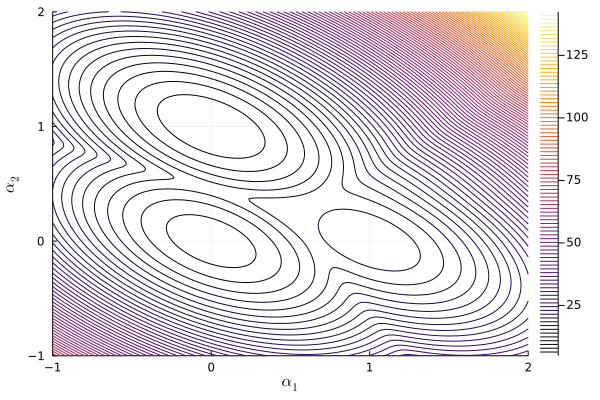

In [4]:
Plots.contour(α1, α2, Z', levels = 90, xlabel = L"α_1", ylabel = L"α_2")


In [17]:
CH.energy(σ1, ξ, 1, 1)

7.721783364663898

In [18]:
CH.energy(σ2, ξ, 1, 1)

4.966823403951556

In [19]:
CH.energy(σ3, ξ, 1, 1)

9.426359527149293

In [9]:
N = 20
α = 0.1
M = round(Int, exp(N*α))
println(M)
ξ = CH.generate_patterns(M, N)
σ = ξ[:, 1]
σ_new = CH.perturb(σ, 2.0)
CH.distance(σ_new, σ)

7


7.635842603493841

In [10]:
σ_rec = CH.update(σ_new, ξ; β = 20, nsweeps = 1)
CH.distance(σ_rec, σ)

4.0176624574354305

In [11]:
exp(N*α)

7.38905609893065

In [5]:
maximum(σ)

1.4125357326048817